#Micorsoft Movie Business Data Analysis
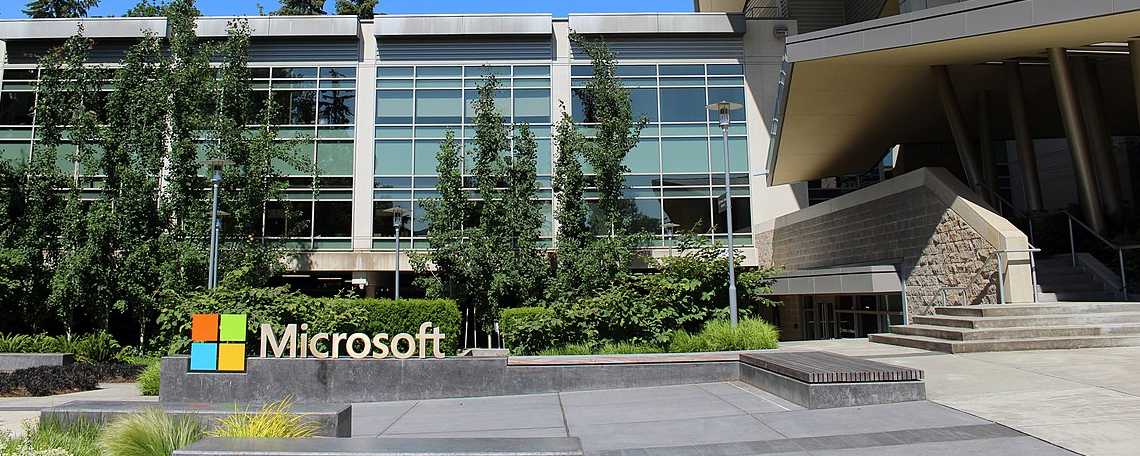

##Overview
Microsoft as tech giant and one of the most successful technology brands of the last 30 years is know for its iconoc Windows operating systems and Office suite of application amongst of other products and service offering for both on-premise and cloud solutions. To add to its numerous service offerings, Microsoft is considering adding cinnematography and movie making. Accordingly, theres need for analysis of the movie industry data to generate insights as the basis for professional recommendations.

#Business Proposals*
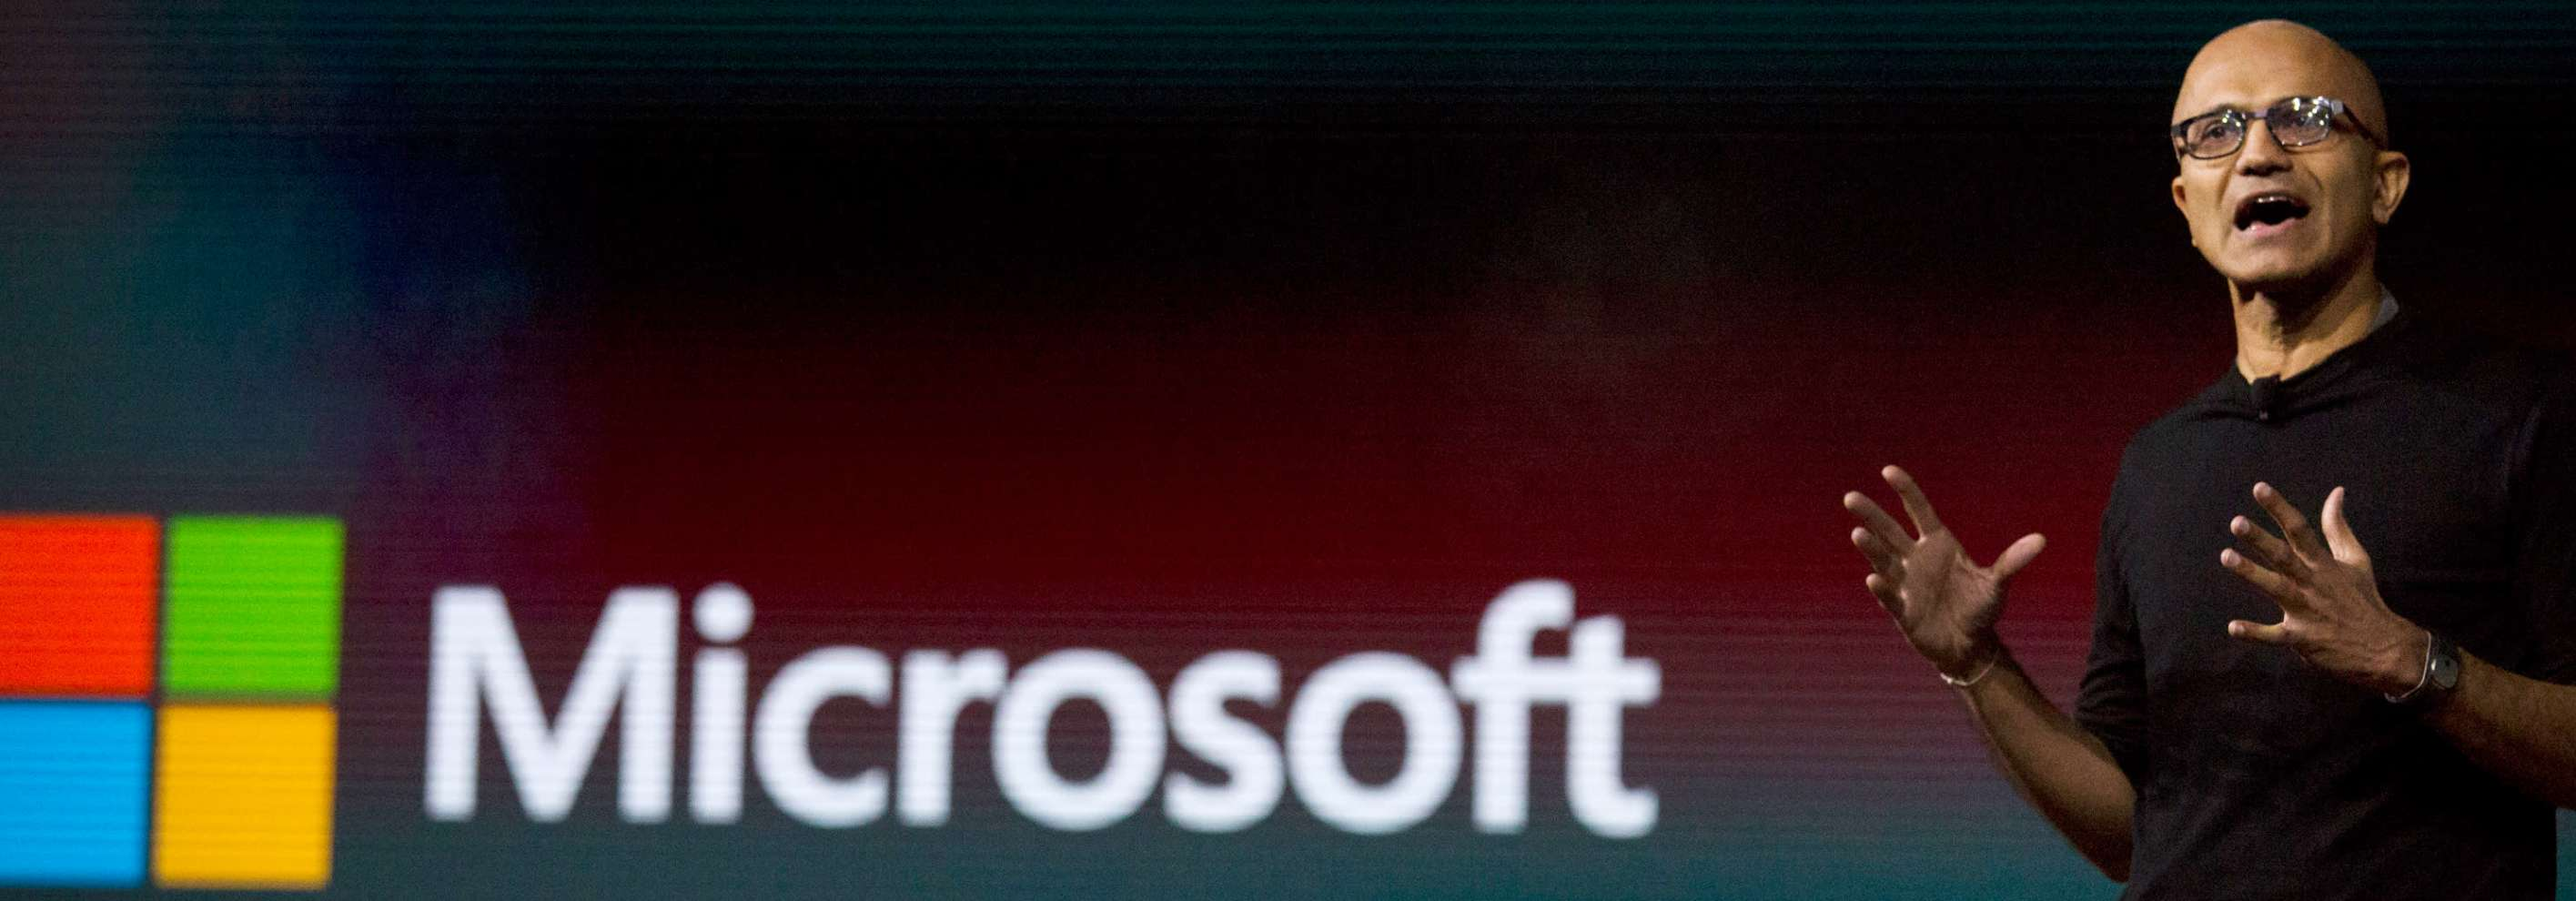
There's need for decision makers at Microsoft to be equiped with facts and figures prior to launching the new movie making business, hence three proposals and recommendations are made as part of this analysis given the provided dataset;

1.   Top studios to consider working with based on gross earnings
2.   Directors to consider working with based on reviews
3.   Relationship between budget and earnings (ROI)





Data Understanding

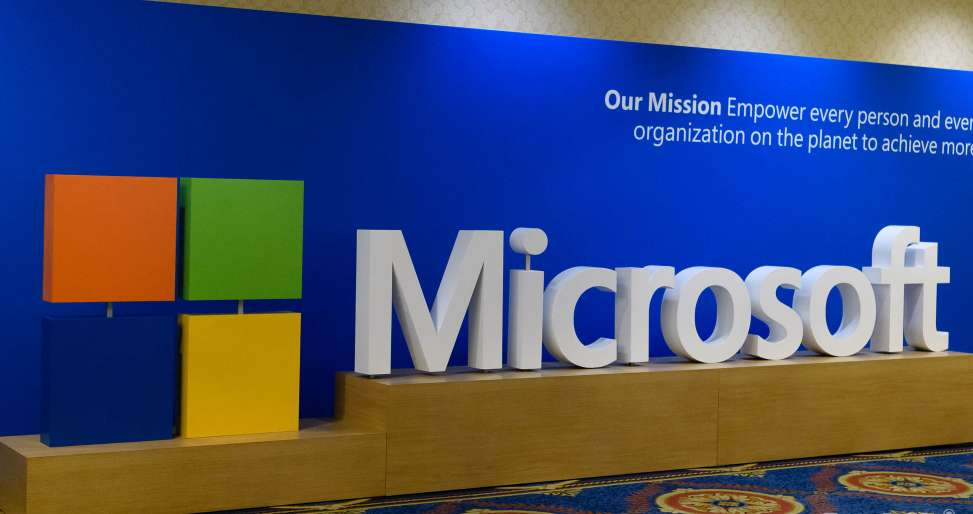
There are tons of data sources on the movie industry with information movie names, ratings, local and foreign gross, boc office information amongst others. The variety opf data csourse means that some data source can be used independently while others need to be merge as its been done in this project. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing necessary libraries needed for across all proposal implementation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

###Proposal One: BOM Movie Dataset
*   Identifying the top domestic and foreign grossing studios between 2010 and 2018 for the purpose of informing stake holders on studio to cosider working 



Data Injection and Preprocessing 

In [ ]:
bom_movie_gross = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/bom.movie_gross.csv.gz")
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
bom_movie_gross.shape

(3387, 5)

In [ ]:
bom_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [ ]:
# Convert foreign_gross colum to float
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

In [ ]:
#confirm the datatype change
bom_movie_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

###Finding and Treating Missing Values

In [ ]:
#Check for missing values
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Contex:

Given that about 40% of the foreign_gross is missing, using impute function on  any of the measure of centrality such as mean, median or mode to replace missing values will impact the bias level in the datset as well as the skewness. Hence we chose to option of dropping the rows with missing values.

Creating a dataframe after dropping missing values

In [ ]:
#re-injest to make the original unchanged
df_bom = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/bom.movie_gross.csv.gz")

In [ ]:
df_bom.dropna(inplace=True)

In [ ]:
df_bom.shape

(2007, 5)

In [ ]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
#confirm missing rows have been dropped
df_bom.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [ ]:
#Check rows with non-numeric values on the foreign_gross cloumn
import pandas as pd
import re

non_numeric = re.compile(r'[^\d.]+')

#df = pd.DataFrame({'a': [3,2,'NA']})
df_bom['foreign_gross'].loc[df_bom['foreign_gross'].str.contains(non_numeric)]

1872    1,131.6
1873    1,019.4
1874    1,163.0
2760    1,010.0
3079    1,369.5
Name: foreign_gross, dtype: object

In [ ]:
#Remove the rows with those data
df_bom = df_bom.drop([1872,1873,1874,2760,3079])

In [ ]:
#covert the column to integer
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'])

In [ ]:
#covert the column to float
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)

In [ ]:
#Confirm type changes
df_bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

###Checking for and Treating Outliers

Plotting for visual representation

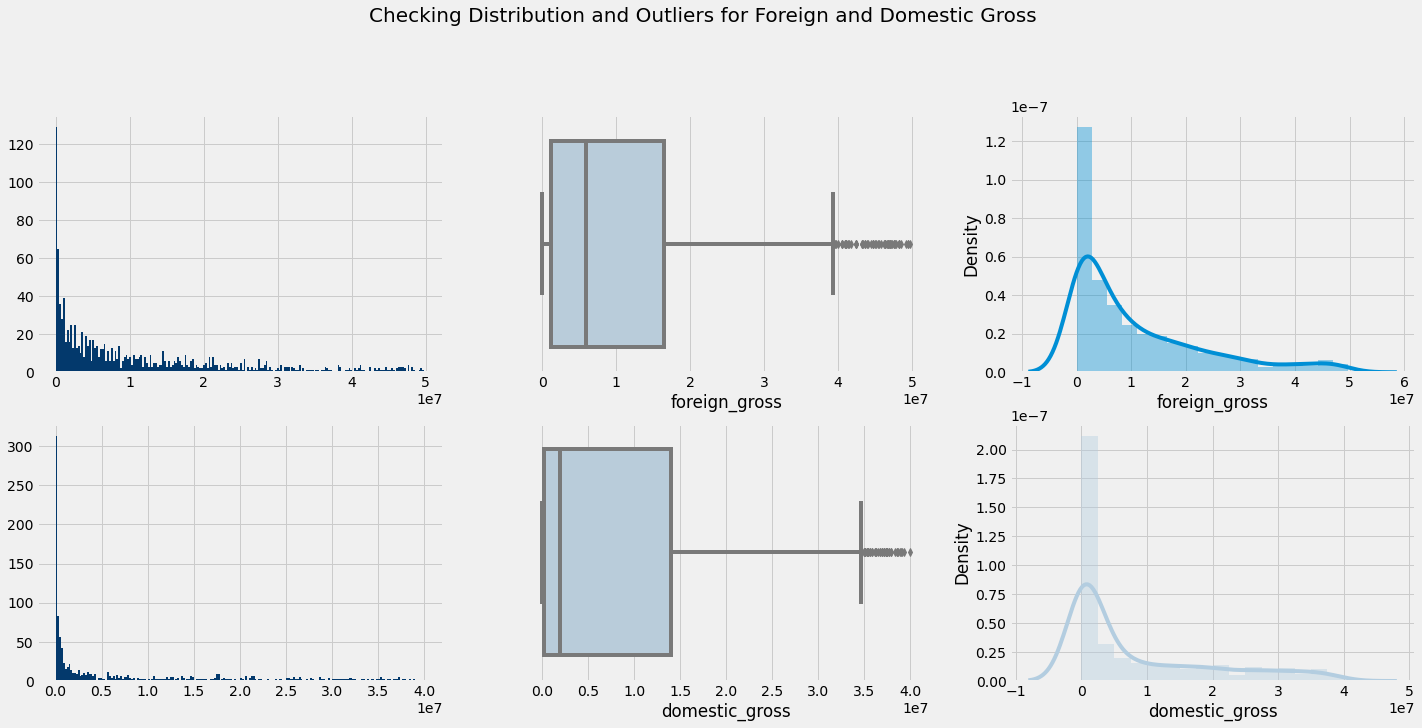

In [ ]:
# initialize our plot space.
plt.figure(figsize=[22,15])
plt.suptitle("Checking Distribution and Outliers for Foreign and Domestic Gross", size=20)

# histogram for foreign gross
plt.subplot(3,3,1)
plt.hist(df_bom['foreign_gross'], bins=200, color='#03396c')
#plt.xlim(0,1000)

# boxplot for foreign gross
plt.subplot(3,3,2)
sns.boxplot(df_bom['foreign_gross'], color='#b3cde0')

# distribution plot for foreign gross
plt.subplot(3,3,3)
sns.distplot(df_bom['foreign_gross'])

# histogram for domestic gross
plt.subplot(3,3,4)
plt.hist(df_bom['domestic_gross'], bins=200, color='#03396c')

# boxplot for domestic gross
plt.subplot(3,3,5)
sns.boxplot(df_bom['domestic_gross'], color='#b3cde0')

# distribution plot for foreign gross
plt.subplot(3,3,6)
sns.distplot(df_bom['domestic_gross'], color='#b3cde0')

plt.show()

In [ ]:
#Skewness the degree of asymmetry observed in a probability distribution. 
print('Skewness : ', df_bom['foreign_gross'].skew())

Skewness :  3.0667438949171353


In [ ]:
# measure of the degree to which scores cluster in the tails or the peak of a frequency distribution.
print('Kurtosis : ', df_bom['foreign_gross'].kurt())

Kurtosis :  10.674168641009764


In [ ]:
df_bom.describe()

,domestic_gross,foreign_gross,year
count,2.002000e+03,2.002000e+03,2002.000000
mean,4.571529e+07,7.597967e+07,2013.500000
std,7.640004e+07,1.383001e+08,2.597475
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.655000e+05,4.000000e+06,2011.000000
50%,1.640000e+07,1.960000e+07,2013.000000
75%,5.570000e+07,7.645000e+07,2016.000000
max,7.001000e+08,9.605000e+08,2018.000000


In [ ]:
#Outputing the range of vlaues
print('Foreign gross minimum : ', df_bom['foreign_gross'].min())
print('Foreign gross maximum : ', df_bom['foreign_gross'].max())
print('Domestic gross minimum : ', df_bom['domestic_gross'].min())
print('Domestic gross minimum : ', df_bom['domestic_gross'].max())

Foreign gross minimum :  600.0
Foreign gross maximum :  960500000.0
Domestic gross minimum :  400.0
Domestic gross minimum :  700100000.0


Taking out Outliers

In [ ]:
#Remove outliers
#Set foreign to 50000000 & dmoestic 40000000
df_bom = df_bom[(df_bom['foreign_gross'] <= 50000000) & (df_bom['domestic_gross'] <= 40000000)]

In [ ]:
df_bom.shape

(1177, 5)

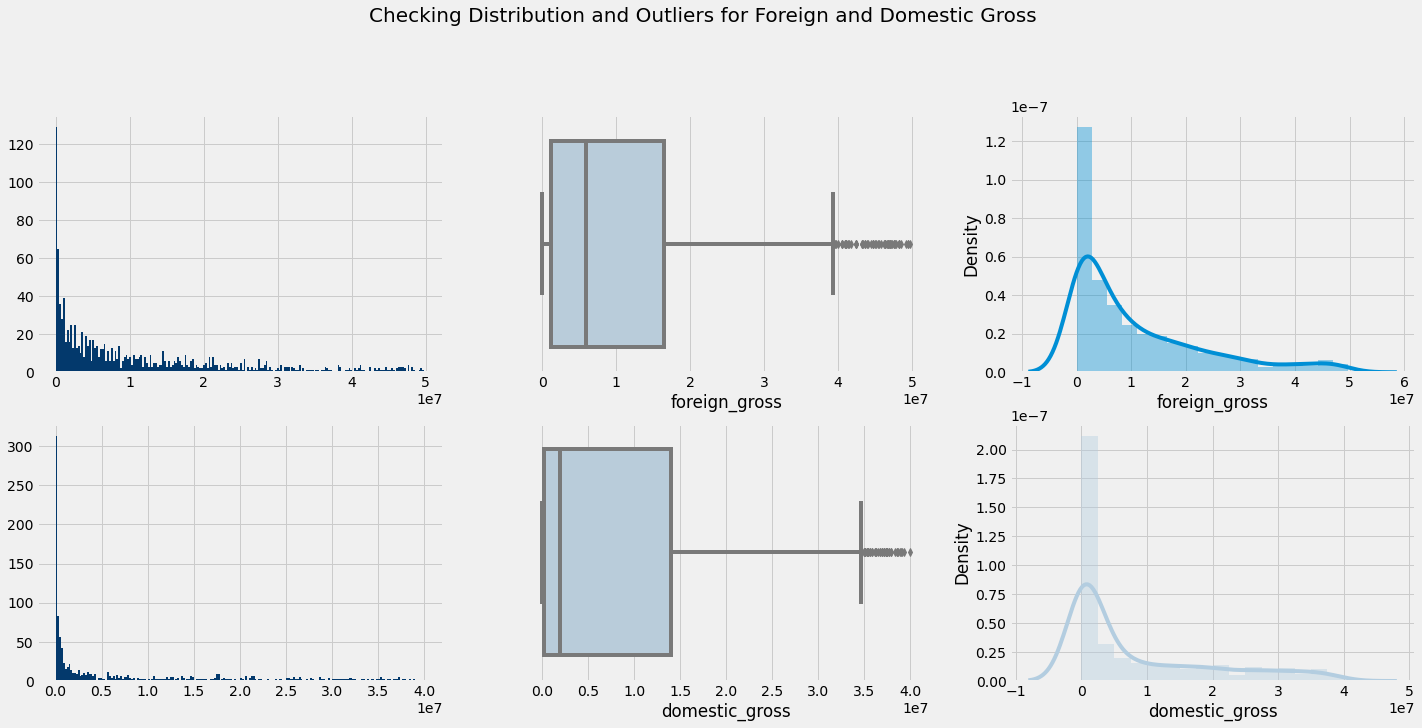

In [ ]:
#Check Visual Representation 
# initialize our plot space.
plt.figure(figsize=[22,15])
plt.suptitle("Checking Distribution and Outliers for Foreign and Domestic Gross", size=20)

# histogram for foreign gross
plt.subplot(3,3,1)
plt.hist(df_bom['foreign_gross'], bins=200, color='#03396c')
#plt.xlim(0,1000)

# boxplot for foreign gross
plt.subplot(3,3,2)
sns.boxplot(df_bom['foreign_gross'], color='#b3cde0')

# distribution plot for foreign gross
plt.subplot(3,3,3)
sns.distplot(df_bom['foreign_gross'])

# histogram for domestic gross
plt.subplot(3,3,4)
plt.hist(df_bom['domestic_gross'], bins=200, color='#03396c')

# boxplot for domestic gross
plt.subplot(3,3,5)
sns.boxplot(df_bom['domestic_gross'], color='#b3cde0')

# distribution plot for foreign gross
plt.subplot(3,3,6)
sns.distplot(df_bom['domestic_gross'], color='#b3cde0')

plt.show()

In [ ]:
#Outputing the range of vlaues
print('Foreign gross minimum : ', df_bom['foreign_gross'].min())
print('Foreign gross maximum : ', df_bom['foreign_gross'].max())
print('Domestic gross minimum : ', df_bom['domestic_gross'].min())
print('Domestic gross minimum : ', df_bom['domestic_gross'].max())

Foreign gross minimum :  600.0
Foreign gross maximum :  49800000.0
Domestic gross minimum :  400.0
Domestic gross minimum :  40000000.0


Finding and Plotting Top 10 Studios for Gross Earnings 

In [ ]:
df_studio__domestic_gross = (df_bom.groupby("studio")["domestic_gross"].sum()).nlargest(10)
df_studio__domestic_gross 

studio
LGF      800345400.0
WB       779000000.0
Uni.     771838000.0
Focus    530100000.0
Fox      524200000.0
Par.     494912700.0
ORF      479899999.0
Rela.    443039000.0
BV       418580699.0
FoxS     401900000.0
Name: domestic_gross, dtype: float64

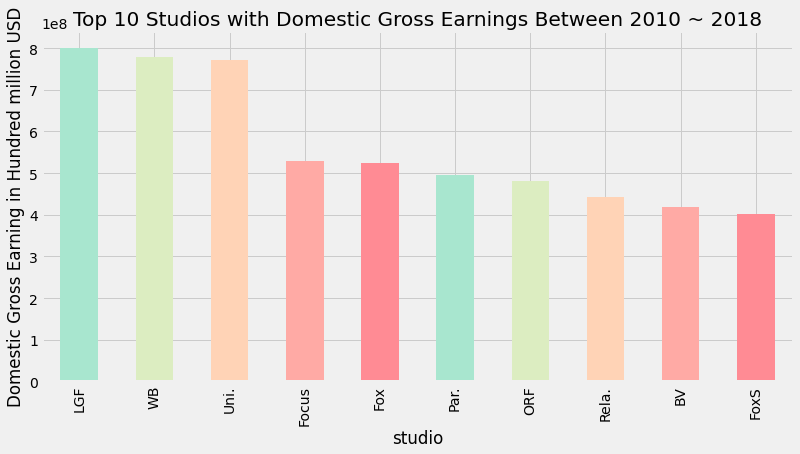

In [ ]:
df_studio__domestic_gross.plot(kind='bar', figsize=[12,6], color = ['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5', '#ff8b94'], title="Top 10 Studios with Domestic Gross Earnings Between 2010 ~ 2018")
plt.ylabel("Domestic Gross Earning in Hundred million USD");

In [ ]:
df_studio__foreign_gross = (df_bom.groupby("studio")["foreign_gross"].sum()).nlargest(10)
df_studio__foreign_gross 

studio
LGF      762372300.0
SPC      741805999.0
Wein.    708085999.0
Uni.     690645999.0
Fox      568177599.0
Focus    548068999.0
WB       546402999.0
FoxS     426987700.0
IFC      398729599.0
FIP      376100000.0
Name: foreign_gross, dtype: float64

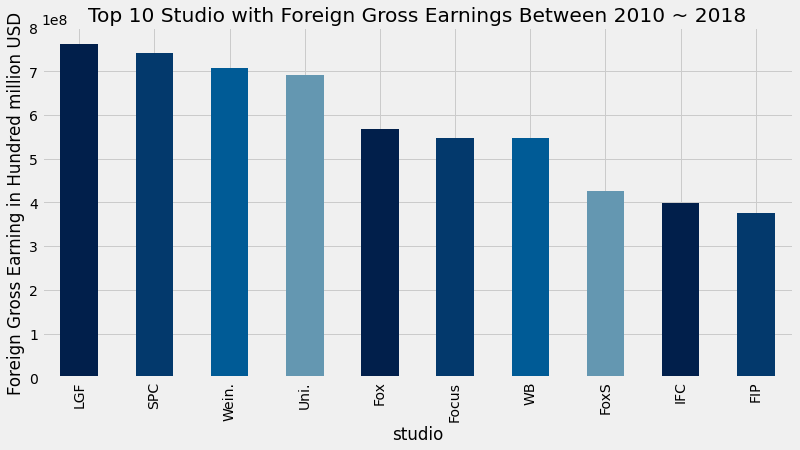

In [ ]:
df_studio__foreign_gross.plot(kind='bar', figsize=[12,6], color = ['#011f4b','#03396c','#005b96','#6497b1'], title="Top 10 Studio with Foreign Gross Earnings Between 2010 ~ 2018")
plt.ylabel("Foreign Gross Earning in Hundred million USD");

Finding Correlation between Domestic and Foreign Gross Earnings

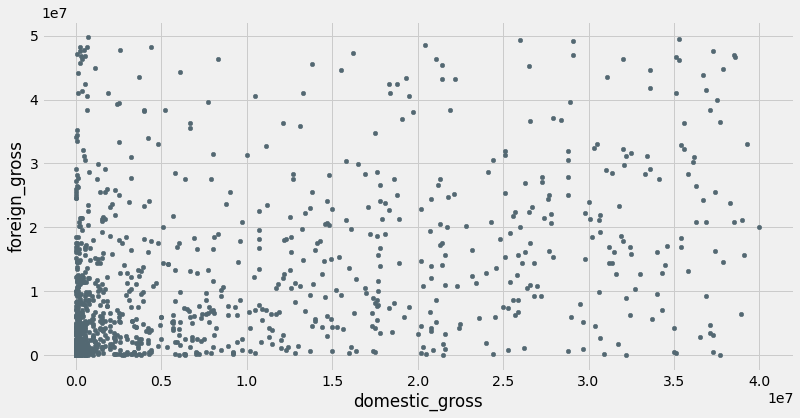

In [ ]:
df_bom.plot.scatter('domestic_gross','foreign_gross', figsize=[12,6], color='#536872');

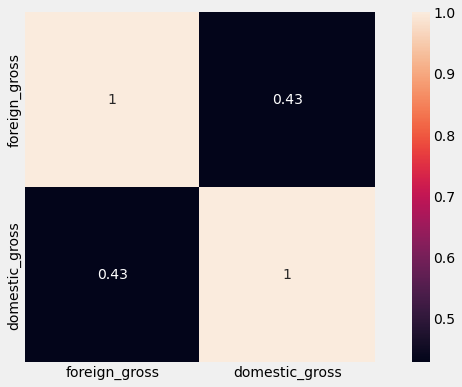

In [ ]:
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(df_bom[['foreign_gross','domestic_gross']].corr(), square=True, annot=True);

#Proposal One End!

#Proposal Two Starts Here

Data Injection, Preprocessing & Preview of the Tables we need

In [ ]:
import sqlite3

In [ ]:
#connecting to the SQL database
conn = sqlite3.connect("/content/drive/MyDrive/Colab Notebooks/zippedData/im.db")

In [ ]:
#Getting list of tables
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [ ]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
movie_basics.shape

(146144, 6)

In [ ]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
movie_ratings.shape

(73856, 3)

In [ ]:
directors = pd.read_sql("SELECT * FROM directors;", conn)
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [ ]:
directors.shape

(291174, 2)

In [ ]:
person = pd.read_sql("SELECT * FROM persons;", conn)
person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [ ]:
person.shape

(606648, 5)

Merge Operations

In [ ]:
# Merge movie_ratings with directors
director_movie_ratings = pd.merge(movie_ratings, directors)
director_movie_ratings .columns

Index(['movie_id', 'averagerating', 'numvotes', 'person_id'], dtype='object')

In [ ]:
director_movie_ratings.head()

,movie_id,averagerating,numvotes,person_id
0,tt10356526,8.3,31,nm8353804
1,tt10356526,8.3,31,nm8353804
2,tt10384606,8.9,559,nm9932562
3,tt10384606,8.9,559,nm9250842
4,tt1042974,6.4,20,nm1915232


In [ ]:
director_movie_ratings .shape

(181389, 4)

In [ ]:
# Merge director_movie_ratings with person
director_person_movie_ratings = pd.merge(director_movie_ratings, person)
director_person_movie_ratings.columns

Index(['movie_id', 'averagerating', 'numvotes', 'person_id', 'primary_name',
       'birth_year', 'death_year', 'primary_profession'],
      dtype='object')

In [ ]:
director_person_movie_ratings.head()

,movie_id,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
3,tt10322936,8.5,44,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt10384606,8.9,559,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"


In [ ]:
director_person_movie_ratings.shape

(181387, 8)

In [ ]:
#Merge director_person_movie_ratings with movie_basics 
movie_basic_director_ratings = pd.merge(movie_basics, director_person_movie_ratings)
movie_basic_director_ratings.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'person_id',
       'primary_name', 'birth_year', 'death_year', 'primary_profession'],
      dtype='object')

In [ ]:
movie_basic_director_ratings.shape

(181387, 13)

In [ ]:
movie_basic_director_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


###Dealing with Missing Values
Assumptions: It is assumed that missing values in the death_year column indicates that the person is still alive

In [ ]:
movie_basic_director_ratings.isna().sum()

movie_id                   0
primary_title              0
original_title             0
start_year                 0
runtime_minutes        17803
genres                  1340
averagerating              0
numvotes                   0
person_id                  0
primary_name               0
birth_year            126582
death_year            180045
primary_profession       125
dtype: int64

In [ ]:
#Getting out the missing values
movie_basic_director_ratings['death_year'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
181382     True
181383     True
181384     True
181385     True
181386     True
Name: death_year, Length: 181387, dtype: bool

In [ ]:
#filtering the dataset
df_final_movie_basic_director_ratings = movie_basic_director_ratings[movie_basic_director_ratings['death_year'].isna()]
df_final_movie_basic_director_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
9,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
12,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32,nm6883878,Mc Jones,NaN,NaN,"actor,director"
13,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer"
14,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451,nm1030585,Ágnes Kocsis,1971.0,NaN,"director,writer,producer"


In [ ]:
#verify that there's no record with death_year
df_final_movie_basic_director_ratings.death_year.value_counts()

Series([], Name: death_year, dtype: int64)

Analysis and Plotting

In [ ]:
df_director_ratings = df_final_movie_basic_director_ratings[['primary_name','numvotes','averagerating','start_year']]
df_director_ratings.head()

,primary_name,numvotes,averagerating,start_year
8,Valeria Sarmiento,119,6.5,2017
9,Valeria Sarmiento,119,6.5,2017
12,Mc Jones,32,4.1,2017
13,Anthony Harrison,263,8.1,2017
14,Ágnes Kocsis,451,6.8,2010


In [ ]:
df_director_ratings.shape

(180045, 4)

In [ ]:
df_director_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180045 entries, 8 to 181386
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   primary_name   180045 non-null  object 
 1   numvotes       180045 non-null  int64  
 2   averagerating  180045 non-null  float64
 3   start_year     180045 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.9+ MB


In [ ]:
df_director_ratings.primary_name.value_counts()

Tony Newton           217
Jason Impey           180
Shane Ryan            177
Ruben Rodriguez       150
Martin Sonntag        135
                     ... 
Laurie Agard            1
Nathan Kaufman          1
Benjamin Duffield       1
Marty Langford          1
Joost van der Wiel      1
Name: primary_name, Length: 56288, dtype: int64

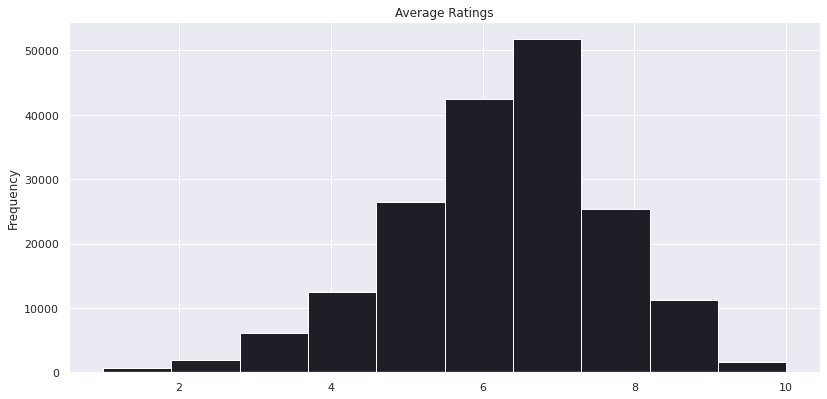

In [128]:
df_director_ratings['averagerating'].plot(kind='hist', figsize=[12,6], color = ['#1e1f26'], title="Average Ratings")
plt.ylabel("Frequency");

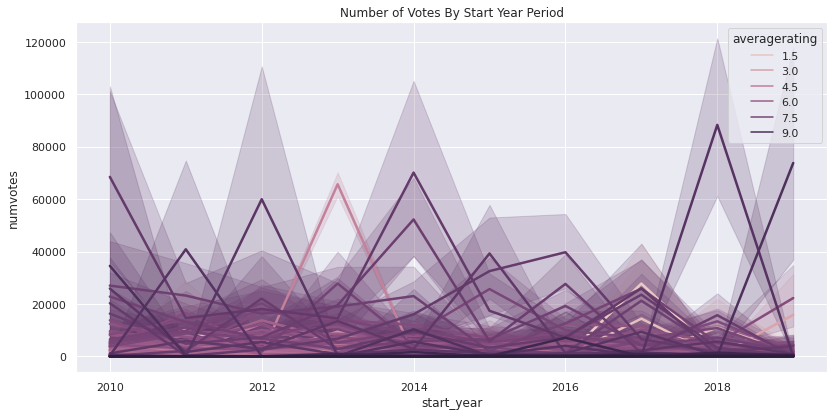

In [ ]:
plt.figure(figsize=[12,6])
sns.lineplot(df_director_ratings['start_year'], df_director_ratings['numvotes'], hue=df_director_ratings['averagerating'], linewidth=2.5).set(title='Number of Votes By Start Year Period')
plt.show()

In [108]:
# get top ten average ratings by primary_name (Director)
df_dir_avg_ratings = (df_director_ratings.groupby("primary_name")["averagerating"].mean()).nlargest(10)
df_dir_avg_ratings

primary_name
Chad Carpenter            10.0
Emre Oran                 10.0
Ivana Diniz               10.0
Lindsay Thompson          10.0
Loreto Di Cesare          10.0
Masahiro Hayakawa         10.0
Michiel Brongers          10.0
Stephen Peek              10.0
Tristan David Luciotti    10.0
Amoghavarsha               9.9
Name: averagerating, dtype: float64

Text(0, 0.5, 'Average Ratings')

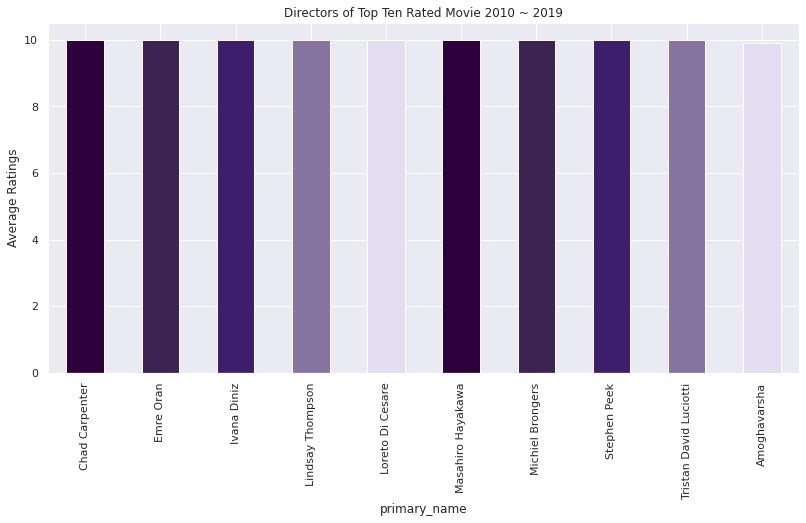

In [109]:
df_dir_avg_ratings.plot(kind='bar', figsize=[12,6], color = ['#2e003e', '#3d2352', '#3d1e6d',  '#8874a3', '#e4dcf1'], title="Directors of Top Ten Rated Movie 2010 ~ 2019")
plt.ylabel("Average Ratings")

In [110]:
# get top ten number of votes by primary_name
df_dir_vote_num = (df_director_ratings.groupby("primary_name")["numvotes"].sum()).nlargest(10)
df_dir_vote_num

primary_name
James Gunn            18640459
Joe Russo             18421688
Anthony Russo         18421593
Zack Snyder           10576977
Christopher Nolan     10457390
Matthew Vaughn         9962120
Peter Jackson          8634677
Christopher Miller     6565719
Phil Lord              6565719
Kenneth Branagh        6454844
Name: numvotes, dtype: int64

Text(0, 0.5, 'Total Votes in Tens of Millions')

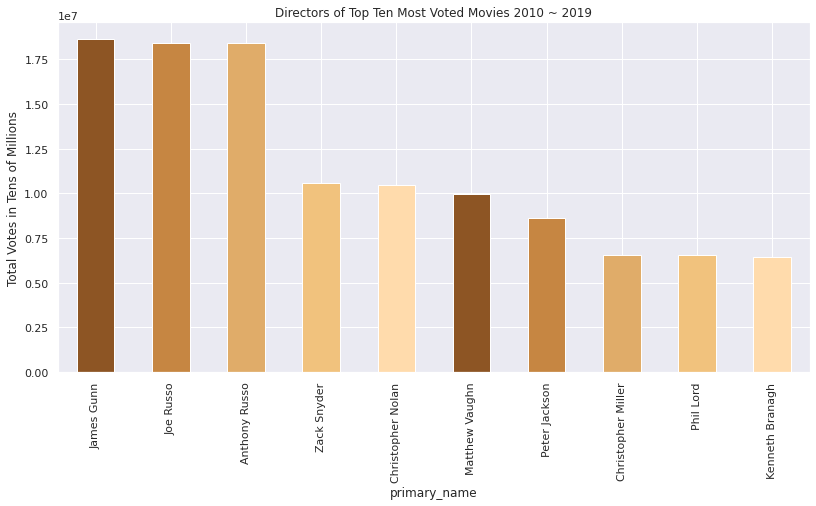

In [111]:
df_dir_vote_num.plot(kind='bar', figsize=[12,6], color = ['#8d5524', '#c68642', '#e0ac69',  '#f1c27d', '#ffdbac'], title="Directors of Top Ten Most Voted Movies 2010 ~ 2019")
plt.ylabel("Total Votes in Tens of Millions")

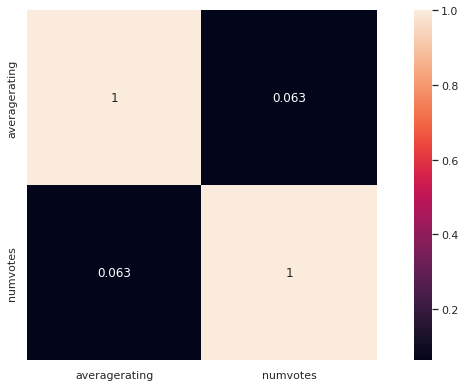

In [112]:
#find correlation between ratings and numbe of votes
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(df_director_ratings[['averagerating','numvotes']].corr(), square=True, annot=True)

#Proposal Two Ends!

---



#Proposal Three Starts Here

Data Analysis & Preprocessing

In [114]:
movie_budget = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zippedData/tn.movie_budgets.csv.gz")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [115]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [116]:
#converting currency with $ to float
movie_budget[movie_budget.columns[3:]] = movie_budget[movie_budget.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [117]:
#confirming the teh conversion
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [118]:
movie_budget.shape

(5782, 6)

In [119]:
#Checking for missing values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Finding and Ploting Correlation Bewteem Production Budget And Gross Earnings

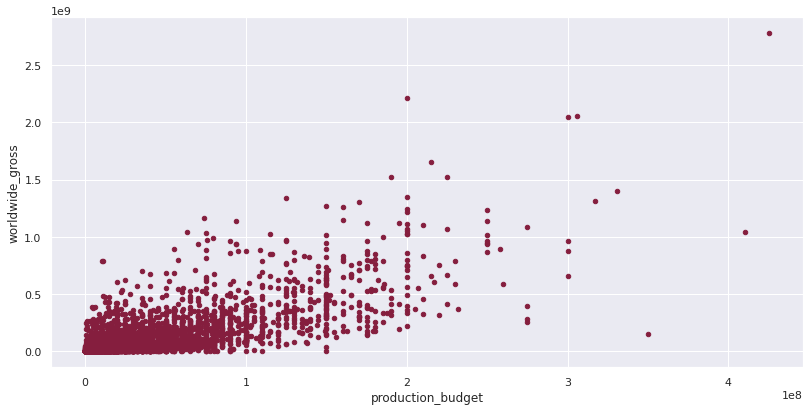

In [120]:
#find correlation between production budget and worldwide gross
movie_budget.plot.scatter('production_budget','worldwide_gross', figsize=[12,6], color='#851e3e');

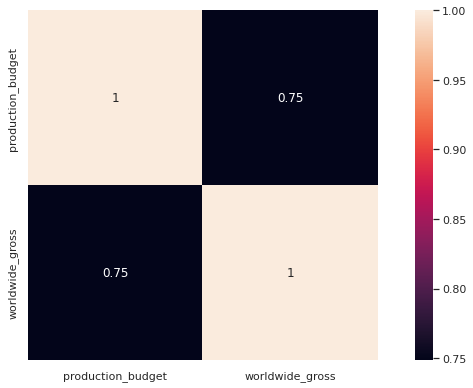

In [125]:
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(movie_budget[['production_budget','worldwide_gross']].corr(), square=True, annot=True);

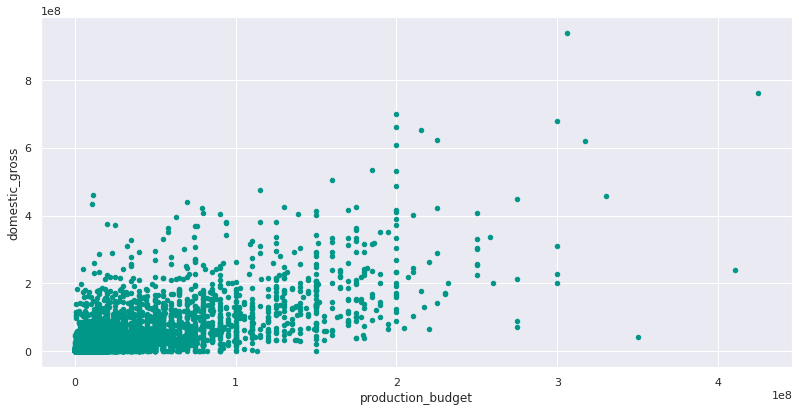

In [124]:
#find correlation between production budget and domestic gross
movie_budget.plot.scatter('production_budget','domestic_gross', figsize=[12,6], color='#009688');

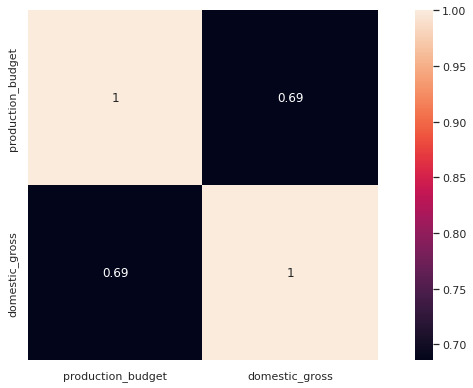

In [126]:
f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(movie_budget[['production_budget','domestic_gross']].corr(), square=True, annot=True);

Inference: Bigger budget should target worldwide release

#Concusions

*   According to BOM movie dataset, the There's 43% chance that an increase in domestic gross earnings will results in foreign gross earnings.
*   There's no correlation between average voting and the number of votesin the there's  a mere 6.3 likelhood that an increase in the number of votes results in increase in the average votes according to movie ratings dataset.
*   There's 75% chance that an increase in production budget will results in increase in worldwide earnings based on the movie budget dataset. That number decrease to 69% with domestic gross earnings.




#Next Steps

*   Machine learning models could such as regression could be used to predict returns on investments and successful movie genre


